In [1]:
from data_loading.load_ens import *

# use Dask to open multiple E files for distributed computing (1 chunk per file)
ds, dsD = load_multiple_ens_data_ED('../data', concat_D=False)
# concat_D set to False for fast demo

ds.keys()

2023-07-14 18:38:35,205 - INFO- Load - Processing fields: wind temperature diffs 
2023-07-14 18:38:35,318 - INFO- Load - Loading complete


KeysView(<xarray.Dataset>
Dimensions:              (number: 5, time: 3, step: 145, latitude: 131,
                          longitude: 157)
Coordinates:
  * number               (number) int64 1 2 3 4 5
  * time                 (time) datetime64[ns] 2017-01-09 2017-01-12 2017-01-16
  * step                 (step) timedelta64[ns] 00:00:00 ... 15 days 00:00:00
    surface              float64 0.0
  * latitude             (latitude) float64 72.0 71.7 71.4 ... 33.6 33.3 33.0
  * longitude            (longitude) float64 -12.0 -11.7 -11.4 ... 34.5 34.8
    valid_time           (time, step) datetime64[ns] dask.array<chunksize=(1, 145), meta=np.ndarray>
    depthBelowLandLayer  float64 100.0
Data variables: (12/14)
    cdir                 (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    sp                   (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    t2m    

In [2]:
def calculate_wind_power(speed, C=0.612):
    return C * speed**3

In [3]:
# calculate wind power
ds = ds.assign(wp10=calculate_wind_power(ds['w10']),
               wp100=calculate_wind_power(ds['w100']))
ds

<xarray.Dataset>
Dimensions:              (number: 5, time: 3, step: 145, latitude: 131,
                          longitude: 157)
Coordinates:
  * number               (number) int64 1 2 3 4 5
  * time                 (time) datetime64[ns] 2017-01-09 2017-01-12 2017-01-16
  * step                 (step) timedelta64[ns] 00:00:00 ... 15 days 00:00:00
    surface              float64 0.0
  * latitude             (latitude) float64 72.0 71.7 71.4 ... 33.6 33.3 33.0
  * longitude            (longitude) float64 -12.0 -11.7 -11.4 ... 34.5 34.8
    valid_time           (time, step) datetime64[ns] dask.array<chunksize=(1, 145), meta=np.ndarray>
    depthBelowLandLayer  float64 100.0
Data variables: (12/16)
    cdir                 (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    sp                   (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    t2m                  (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    ssrd                 (time, number, step, latitude, longitude) float64 dask.array<chunksize=(1, 5, 1, 131, 157), meta=np.ndarray>
    sr                   (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    al                   (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    ...                   ...
    stl4                 (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    d2m                  (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    w10                  (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    w100                 (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    wp10                 (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
    wp100                (time, number, step, latitude, longitude) float32 dask.array<chunksize=(1, 5, 145, 131, 157), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-07-14T18:38 GRIB to CDM+CF via cfgrib-0.9.1...

[                                        ] | 0% Completed | 103.73 ms

[########################################] | 100% Completed | 30.85 s


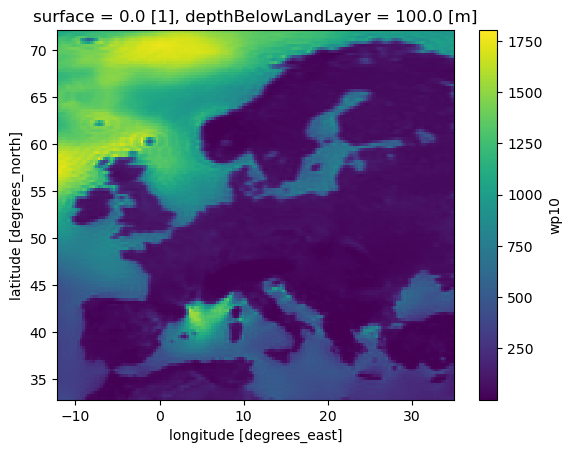

In [4]:
from dask.diagnostics import ProgressBar
ProgressBar().register()

# plot average wind power over space
ds.wp10.mean(dim=['number', 'time', 'step']).plot()

In [5]:
# reduce the dataset to time series of spatial and ensemble means
from preprocessing.reducers import *
spatial_reduced_ds = calculate_climatological_spatial_mean(ds)
spatial_reduced_ds.keys()

KeysView(<xarray.Dataset>
Dimensions:              (time: 3, step: 145)
Coordinates:
  * time                 (time) datetime64[ns] 2017-01-09 2017-01-12 2017-01-16
  * step                 (step) timedelta64[ns] 00:00:00 ... 15 days 00:00:00
    surface              float64 0.0
    valid_time           (time, step) datetime64[ns] dask.array<chunksize=(1, 145), meta=np.ndarray>
    depthBelowLandLayer  float64 100.0
Data variables:
    t2m                  (time, step) float64 dask.array<chunksize=(1, 145), meta=np.ndarray>
    d2m                  (time, step) float64 dask.array<chunksize=(1, 145), meta=np.ndarray>
    stl4                 (time, step) float64 dask.array<chunksize=(1, 145), meta=np.ndarray>
    ssrd                 (time, step) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    strd                 (time, step) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    w10                  (time, step) float64 dask.array<chunksize=(1, 145), meta=np.ndarray>
    

In [6]:
ts = spatial_reduced_ds.w10.to_dataframe().set_index('valid_time')['w10']
ts.index.duplicated().sum()

[########################################] | 100% Completed | 103.58 ms
[########################################] | 100% Completed | 29.05 s


126

<Axes: xlabel='valid_time'>

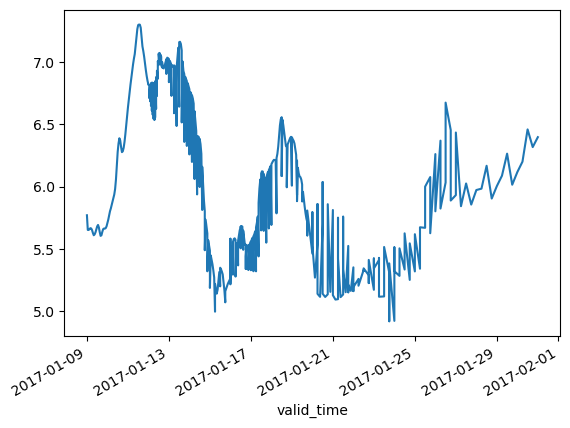

In [7]:
ts.plot()

<Axes: xlabel='valid_time'>

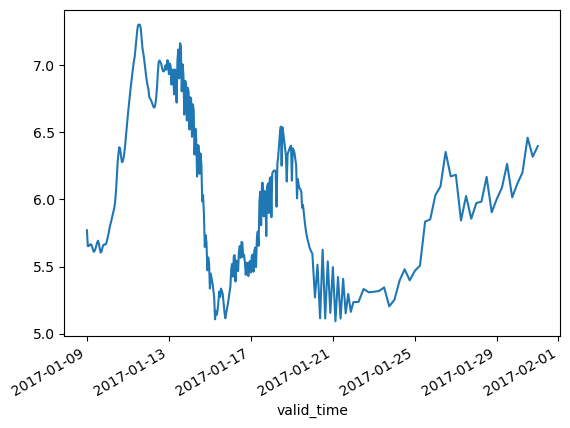

In [8]:
ts.groupby(ts.index).mean().plot()

In [9]:
# calculate average over ensembles and files per date
cross_date_ds = cross_date_mean(ds)
cross_date_ds

[########################################] | 100% Completed | 104.81 ms


<xarray.Dataset>
Dimensions:              (date: 23, latitude: 131, longitude: 157)
Coordinates:
    surface              float64 0.0
  * latitude             (latitude) float64 72.0 71.7 71.4 ... 33.6 33.3 33.0
  * longitude            (longitude) float64 -12.0 -11.7 -11.4 ... 34.5 34.8
    depthBelowLandLayer  float64 100.0
  * date                 (date) object 2017-01-09 2017-01-10 ... 2017-01-31
Data variables:
    t2m                  (date, latitude, longitude) float32 dask.array<chunksize=(1, 131, 157), meta=np.ndarray>
    d2m                  (date, latitude, longitude) float32 dask.array<chunksize=(1, 131, 157), meta=np.ndarray>
    stl4                 (date, latitude, longitude) float32 dask.array<chunksize=(1, 131, 157), meta=np.ndarray>
    ssrd                 (date, latitude, longitude) float64 dask.array<chunksize=(1, 131, 157), meta=np.ndarray>
    strd                 (date, latitude, longitude) float64 dask.array<chunksize=(1, 131, 157), meta=np.ndarray>
    w10                  (date, latitude, longitude) float32 dask.array<chunksize=(1, 131, 157), meta=np.ndarray>
    w100                 (date, latitude, longitude) float32 dask.array<chunksize=(1, 131, 157), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-07-14T18:38 GRIB to CDM+CF via cfgrib-0.9.1...

2023-07-14 19:05:51,219 - WARNING- Load - MovieWriter ffmpeg unavailable; using Pillow instead.
2023-07-14 19:05:51,220 - INFO- Load - Animation.save using <class 'matplotlib.animation.PillowWriter'>


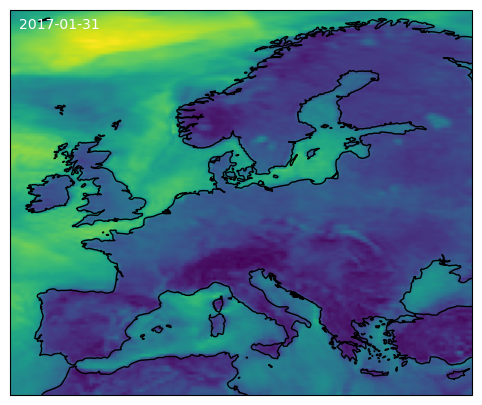

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.interpolate import griddata
import cartopy.crs as ccrs

# Load your data into a DataFrame
# df = cross_date_ds.w10.to_dataframe().reset_index()

# Unique dates
dates = df['date'].unique()

# Grid
lon = np.linspace(df['longitude'].min(), df['longitude'].max(), 157)
lat = np.linspace(df['latitude'].min(), df['latitude'].max(), 131)
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Initialize figure
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Draw initial frame
def init():
    day = dates[0]
    df_day = df[df['date'] == day]
    values = griddata((df_day['longitude'], df_day['latitude']), df_day['w10'], 
                      (lon_grid, lat_grid), method='cubic')
    im = ax.imshow(values, extent=[df['longitude'].min(), df['longitude'].max(), 
                                   df['latitude'].min(), df['latitude'].max()], 
                   origin='lower', animated=True)
    ax.text(0.02, 0.95, str(day), transform=ax.transAxes, color='white')
    return im,

# Draw each frame
def update(i):
    ax.clear()
    ax.coastlines()
    day = dates[i]
    df_day = df[df['date'] == day]
    values = griddata((df_day['longitude'], df_day['latitude']), df_day['w10'], 
                      (lon_grid, lat_grid), method='cubic')
    im = ax.imshow(values, extent=[df['longitude'].min(), df['longitude'].max(), 
                                   df['latitude'].min(), df['latitude'].max()], 
                   origin='lower', animated=True)
    ax.text(0.02, 0.95, str(day), transform=ax.transAxes, color='white')
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(len(dates)), init_func=init, blit=True)
ani.save('cross_date_wind.gif', writer='ffmpeg')

import IPython
IPython.display.Image(url='cross_date_wind.gif')